In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [26]:
# Start and end time (in milliseconds)
t0 = 0
t1 = 100
t = np.linspace(t0, t1, 100000)

# Membrane capacitance (uF/cm^2)
C = 1.0

# Potassium potential (mV)
VK = -10

# Sodium potential (mV)
VNa = 110

# Leak potential (mV)
Vl = 10.0

# Potassium channel conductance (mS/cm^2)
gK = 4.0

# Sodium channel conductance (mS/cm^2)
gNa = 4.0

# Leak channel conductance (mS/cm^2)
gL = 1.0

# Rate functions as defined in model
def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp((10.0 - Vm) / 10.0) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp((25.0 - Vm) / 10) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp((30 - Vm) / 10) + 1.0)

# Now define the n, m, and h's long term behvious as described in the model
def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

# In the differential equations defined, external stimulus is not depicted
# we encode it as a current density in the input signal.
# We implement the external pulse as two square pulses
def I(t):
    if 0.0 < t < 1.0:
        return 100.0
    elif 10.0 < t < 11.0:
        return 50.0
    return 0.0
    # return 100.0 * np.exp(-np.power(t - 50.0, 2.0) / (2.0 * np.power(5.0, 2.0)))
    
def derivatives(y, t0):
    dy = np.zeros((4,))

    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]

    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)

    # dVm/dt
    dy[0] = (I(t0) / C) - (((gK / C) * np.power(n, 4.0)) 
                        * (Vm - VK)) - (((gNa / C) * np.power(m, 3.0) * h) 
                        * (Vm - VNa)) - ((gL / C) * (Vm - Vl))
    
    return dy

# Solve ODE system
state = np.array([0.0, n_inf(), m_inf(), h_inf()])
results = odeint(derivatives, state, t)

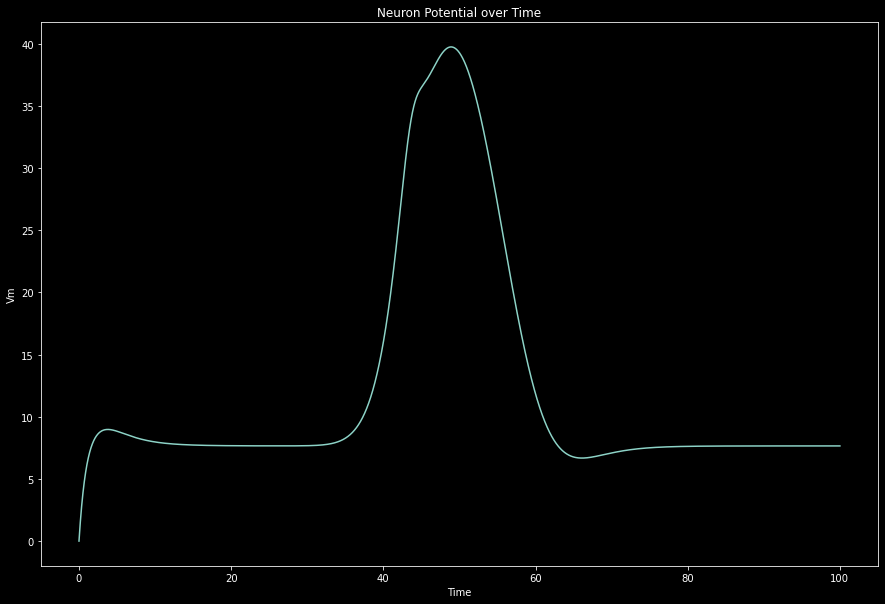

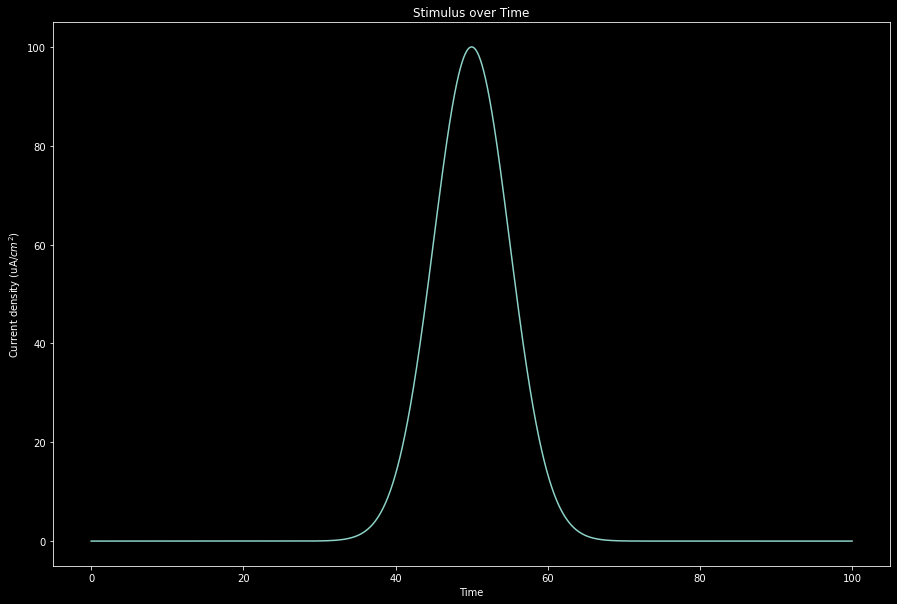

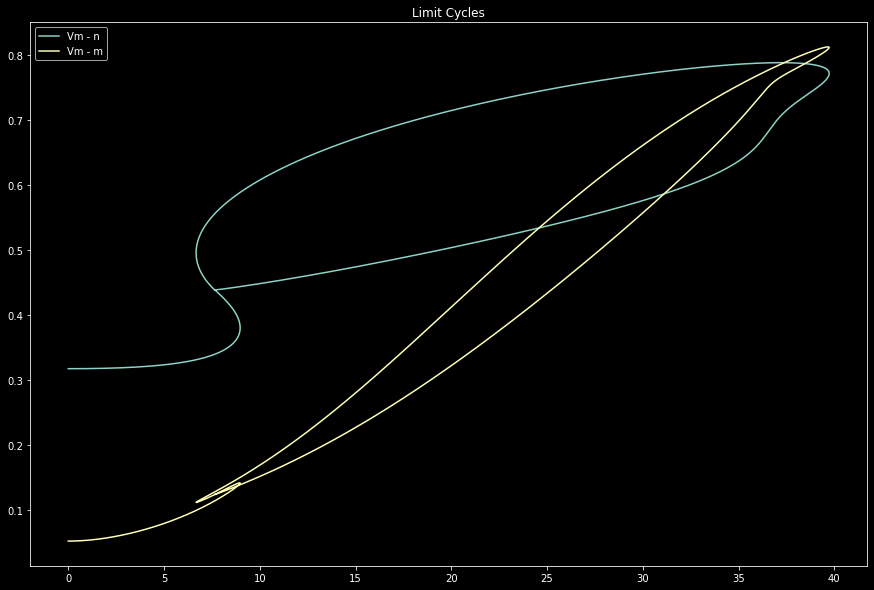

In [27]:
# Input stimulus
Idv = [I(t) for t in t]

# Plot neuron potential over time
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, results[:, 0])
ax.set_xlabel('Time')
ax.set_ylabel('Vm')
ax.set_title('Neuron Potential over Time')

# Plotting the stimulus over time
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, Idv)
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_xlabel('Time')
ax.set_title('Stimulus over Time')

# Plot some trajectories
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(results[:, 0], results[:, 1], label='Vm - n')
ax.plot(results[:, 0], results[:, 2], label='Vm - m')
ax.set_title('Limit Cycles')
ax.legend()

### Plotting Parameters over time

In [5]:
# This is the output vector of trajectories for all of the variables, Vm, n, m, and h
results.shape

(100000, 4)

Text(0.5, 1.0, 'h over Time')

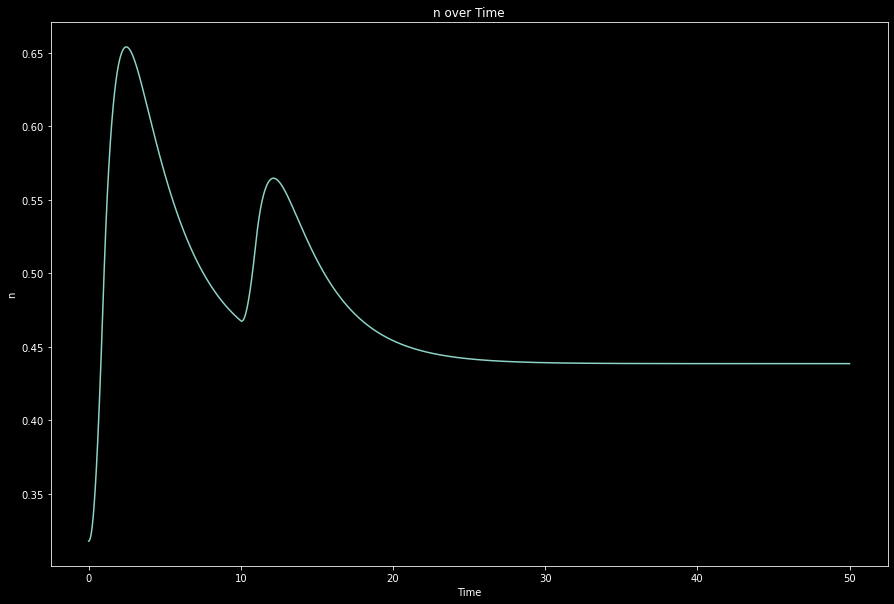

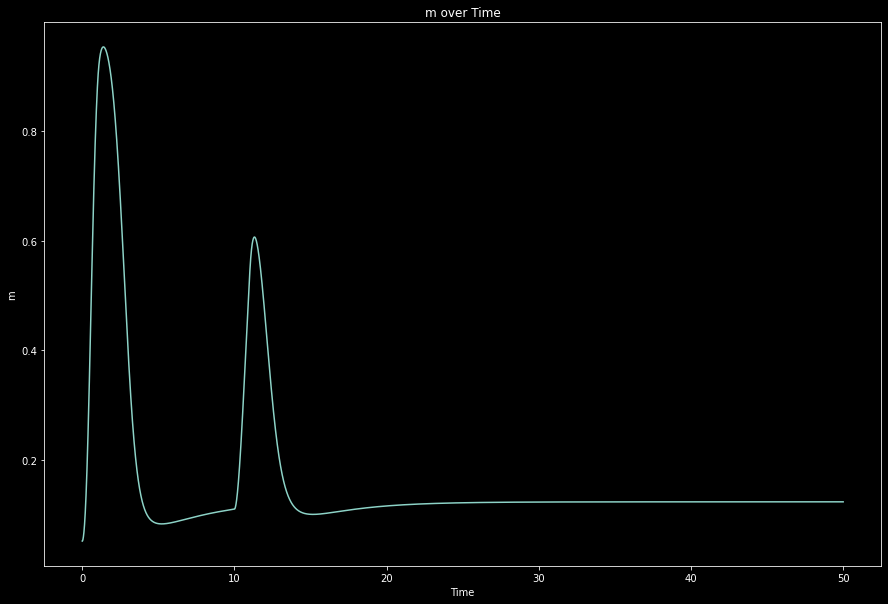

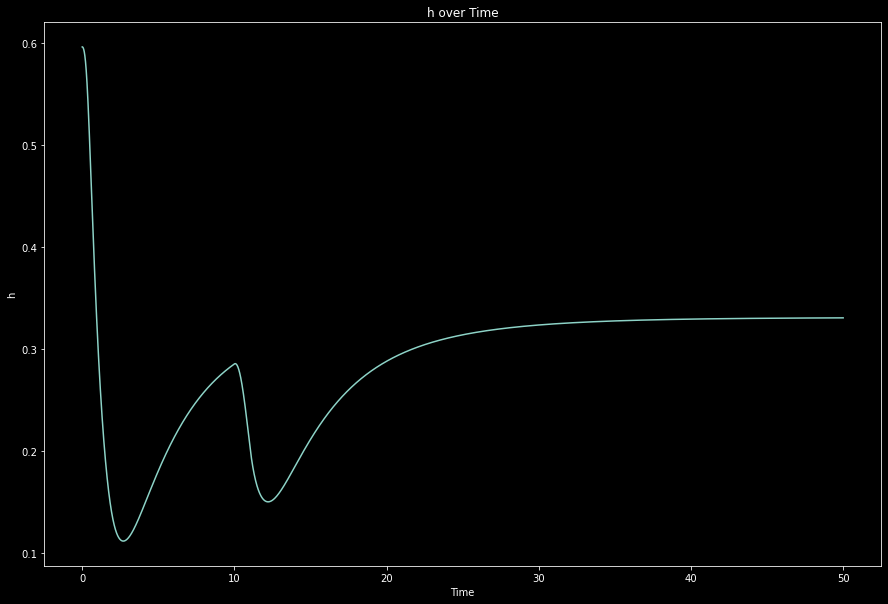

In [6]:
# Plot n vs time
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, results[:, 1])
ax.set_xlabel('Time')
ax.set_ylabel('n')
ax.set_title('n over Time')

# Plot m vs time
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, results[:, 2])
ax.set_xlabel('Time')
ax.set_ylabel('m')
ax.set_title('m over Time')

# Plot h vs time
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, results[:, 3])
ax.set_xlabel('Time')
ax.set_ylabel('h')
ax.set_title('h over Time')

### Gaussian input pulse
Here we redifine the model and apply a gaussian input pulse instead of the two square pulses previously used.

In [28]:
# Define I_two(t) as gaussian centered on 100
def I_two(t):
    return 100.0 * np.exp(-np.power(t - 50.0, 2.0) / (2.0 * np.power(5.0, 2.0)))

t0 = 0
t1 = 100
t = np.linspace(t0, t1, 100000)
    
def derivatives(y, t0):
    dy = np.zeros((4,))

    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]

    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)

    # dVm/dt
    dy[0] = (I_two(t0) / C) - (((gK / C) * np.power(n, 4.0)) 
                        * (Vm - VK)) - (((gNa / C) * np.power(m, 3.0) * h) 
                        * (Vm - VNa)) - ((gL / C) * (Vm - Vl))
    
    return dy

# Solve ODE system
state = np.array([0.0, n_inf(), m_inf(), h_inf()])
results = odeint(derivatives, state, t)

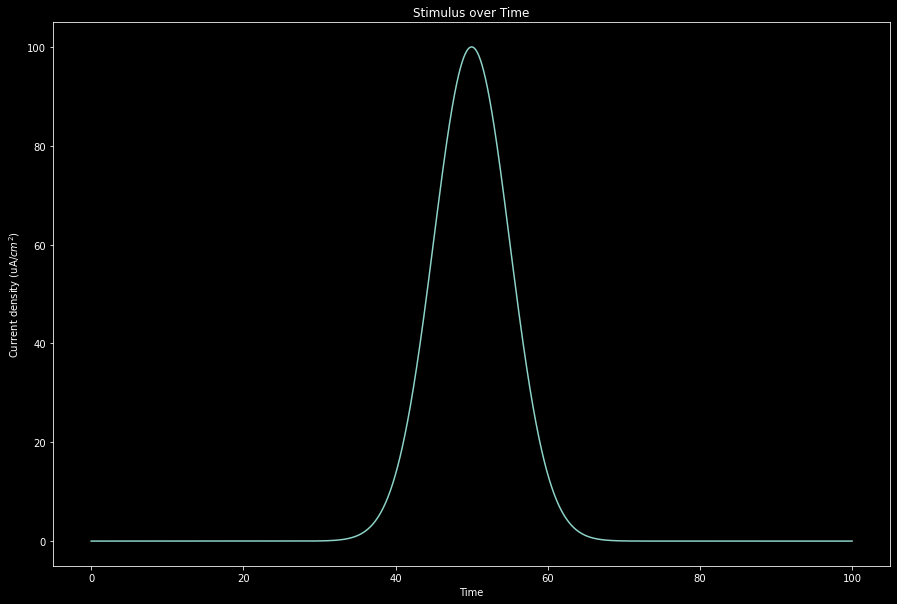

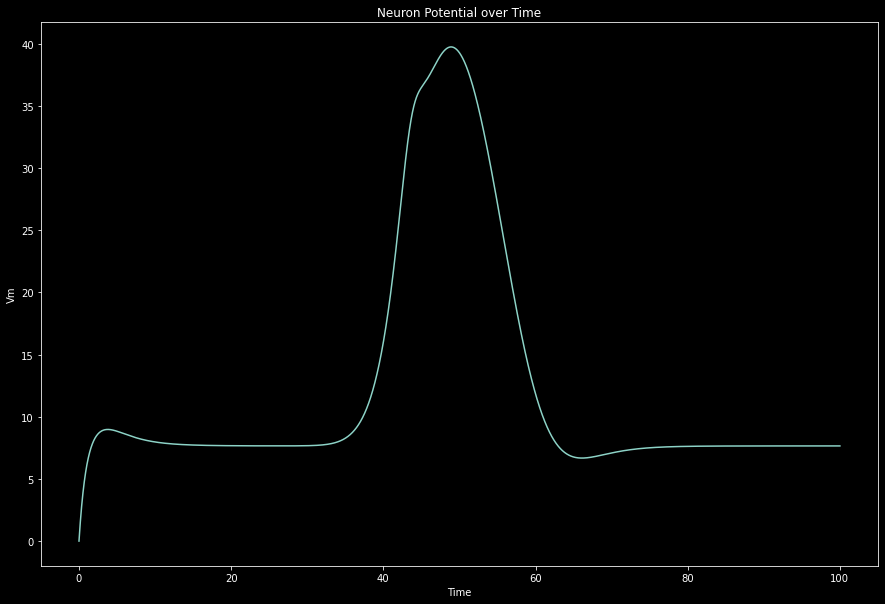

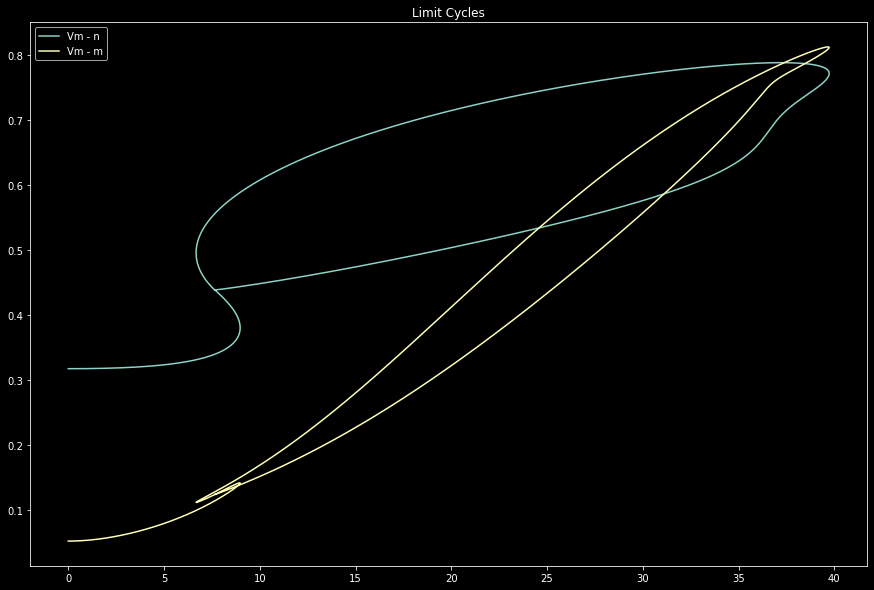

In [29]:
# Input stimulus
Idv = [I_two(t) for t in t]

# Plotting the stimulus over time
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, Idv)
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_xlabel('Time')
ax.set_title('Stimulus over Time')

# Plot neuron potential over time
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, results[:, 0])
ax.set_xlabel('Time')
ax.set_ylabel('Vm')
ax.set_title('Neuron Potential over Time')

# Plot some trajectories
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(results[:, 0], results[:, 1], label='Vm - n')
ax.plot(results[:, 0], results[:, 2], label='Vm - m')
ax.set_title('Limit Cycles')
ax.legend()

### Changing Parameters

### References:
Problem set 5 implementation  
https://www.bonaccorso.eu/2017/08/19/hodgkin-huxley-spiking-neuron-model-python/   